In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
import xgboost as xgb 

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [15]:
import tensorflow as tf

In [16]:
from tensorflow import keras

In [17]:
df=pd.read_csv("data-ori.csv")


In [18]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [20]:
df.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [21]:
df.shape

(4412, 11)

In [22]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HAEMATOCRIT'>

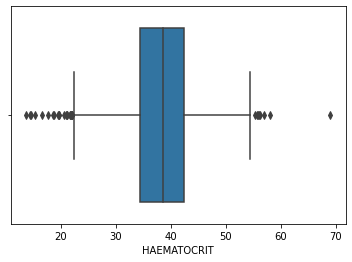

In [23]:
sns.boxplot(df['HAEMATOCRIT'])

In [24]:
q1=df['HAEMATOCRIT'].quantile(0.25)

In [25]:
q3=df['HAEMATOCRIT'].quantile(0.75)

In [26]:
IQR=q3-q1

In [27]:
lower=q1-1.5*IQR

In [28]:
upper=q3+1.5*IQR

In [29]:
df=df[(df['HAEMATOCRIT']>lower) & (df['HAEMATOCRIT']<upper)]

In [30]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HAEMOGLOBINS'>

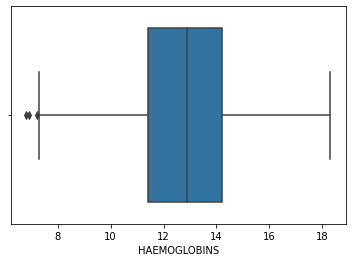

In [31]:
sns.boxplot(df['HAEMOGLOBINS'])

In [32]:
q1=df['HAEMOGLOBINS'].quantile(0.25)

In [33]:
q3=df['HAEMOGLOBINS'].quantile(0.75)

In [34]:
IQR=q3-q1

In [35]:
lower=q1-1.5*IQR

In [36]:
upper=q3+1.5*IQR

In [37]:
df=df[(df['HAEMOGLOBINS']>lower) & (df['HAEMOGLOBINS']<upper)]

In [38]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ERYTHROCYTE'>

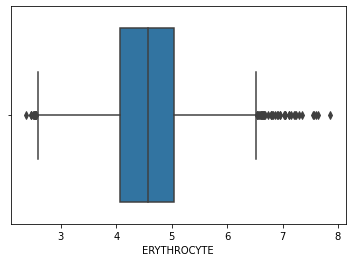

In [39]:
sns.boxplot(df['ERYTHROCYTE'])

In [40]:
q1=df['ERYTHROCYTE'].quantile(0.25)

In [41]:
q3=df['ERYTHROCYTE'].quantile(0.75)

In [42]:
IQR=q3-q1

In [43]:
lower=q1-1.5*IQR

In [44]:
upper=q3+1.5*IQR

In [45]:
df=df[(df['ERYTHROCYTE']>lower) & (df['ERYTHROCYTE']<upper)]

In [46]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LEUCOCYTE'>

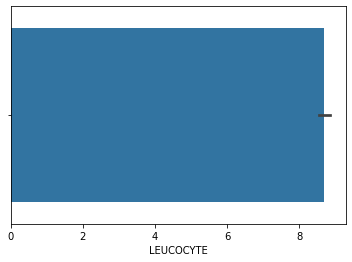

In [47]:
sns.barplot(df['LEUCOCYTE'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='THROMBOCYTE'>

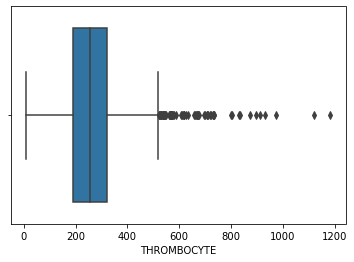

In [48]:
sns.boxplot(df['THROMBOCYTE'])

In [49]:
q1=df['THROMBOCYTE'].quantile(0.25)

In [50]:
q3=df['THROMBOCYTE'].quantile(0.75)

In [51]:
IQR=q3-q1

In [52]:
lower=q1-1.5*IQR

In [53]:
upper=q3+1.5*IQR

In [54]:
df=df[(df['THROMBOCYTE']>lower) & (df['THROMBOCYTE']<upper)]

In [55]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MCH'>

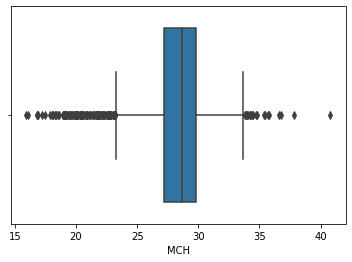

In [56]:
sns.boxplot(df['MCH'])

In [57]:
q1=df['MCH'].quantile(0.25)

In [58]:
q3=df['MCH'].quantile(0.75)

In [59]:
IQR=q3-q1

In [60]:
lower=q1-1.5*IQR

In [61]:
upper=q3+1.5*IQR

In [62]:
df=df[(df['MCH']>lower) & (df['MCH']<upper)]

In [63]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MCHC'>

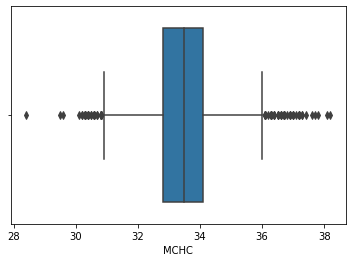

In [64]:
sns.boxplot(df['MCHC'])

In [65]:
q1=df['MCHC'].quantile(0.25)

In [66]:
q3=df['MCHC'].quantile(0.75)

In [67]:
IQR=q3-q1

In [68]:
lower=q1-1.5*IQR

In [69]:
upper=q3+1.5*IQR

In [70]:
df=df[(df['MCHC']>lower) & (df['MCHC']<upper)]

In [71]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MCV'>

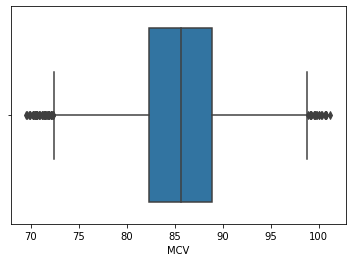

In [72]:
sns.boxplot(df['MCV'])

In [73]:
q1=df['MCV'].quantile(0.25)

In [74]:
q3=df['MCV'].quantile(0.75)

In [75]:
IQR=q3-q1

In [76]:
lower=q1-1.5*IQR

In [77]:
upper=q3+1.5*IQR

In [78]:
df=df[(df['MCV']>lower) & (df['MCV']<upper)]

In [79]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

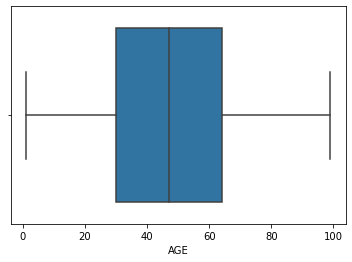

In [80]:
sns.boxplot(df['AGE'])

In [81]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out


<AxesSubplot:xlabel='SOURCE', ylabel='HAEMATOCRIT'>

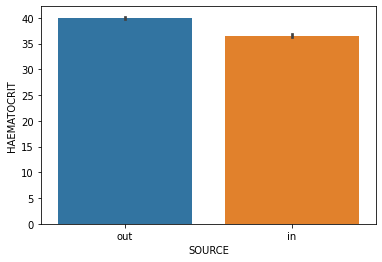

In [82]:
sns.barplot(x=df['SOURCE'],y=df['HAEMATOCRIT'])

<AxesSubplot:xlabel='SOURCE', ylabel='HAEMOGLOBINS'>

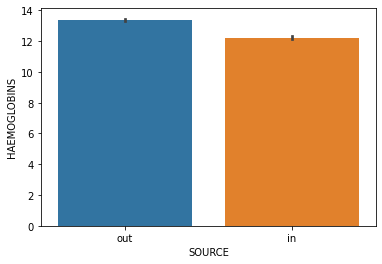

In [83]:
sns.barplot(x=df['SOURCE'],y=df['HAEMOGLOBINS'])

<AxesSubplot:xlabel='SOURCE', ylabel='ERYTHROCYTE'>

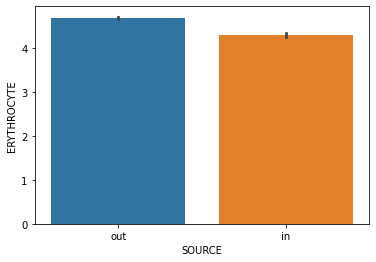

In [84]:
sns.barplot(x=df['SOURCE'],y=df['ERYTHROCYTE'])

<AxesSubplot:xlabel='SOURCE', ylabel='LEUCOCYTE'>

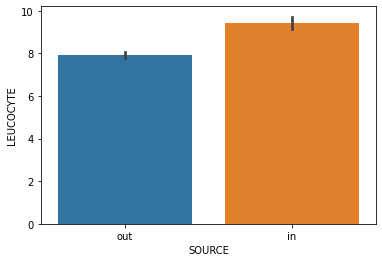

In [85]:
sns.barplot(x=df['SOURCE'],y=df['LEUCOCYTE'])

<AxesSubplot:xlabel='SOURCE', ylabel='THROMBOCYTE'>

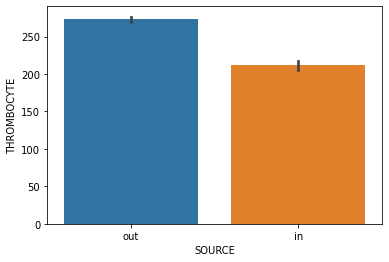

In [86]:
sns.barplot(x=df['SOURCE'],y=df['THROMBOCYTE'])

<AxesSubplot:xlabel='SOURCE', ylabel='MCH'>

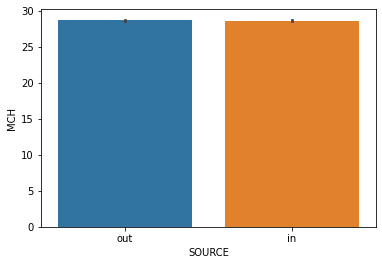

In [87]:
sns.barplot(x=df['SOURCE'],y=df['MCH'])

<AxesSubplot:xlabel='SOURCE', ylabel='MCHC'>

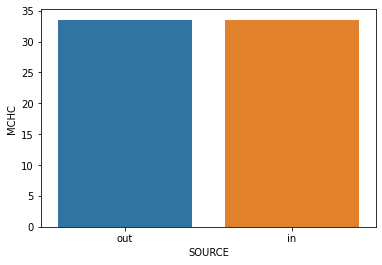

In [88]:
sns.barplot(x=df['SOURCE'],y=df['MCHC'])

<AxesSubplot:xlabel='SOURCE', ylabel='MCV'>

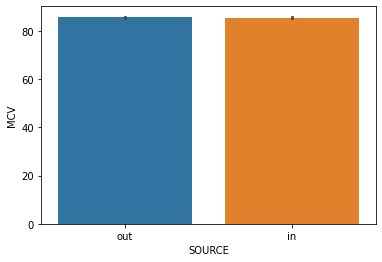

In [89]:
sns.barplot(x=df['SOURCE'],y=df['MCV'])

<AxesSubplot:xlabel='SOURCE', ylabel='AGE'>

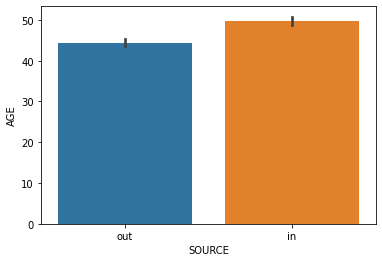

In [90]:
sns.barplot(x=df['SOURCE'],y=df['AGE'])

In [91]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out


<AxesSubplot:xlabel='SEX', ylabel='count'>

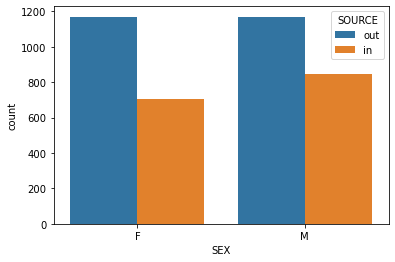

In [92]:
sns.countplot(x=df['SEX'],hue=df['SOURCE'])

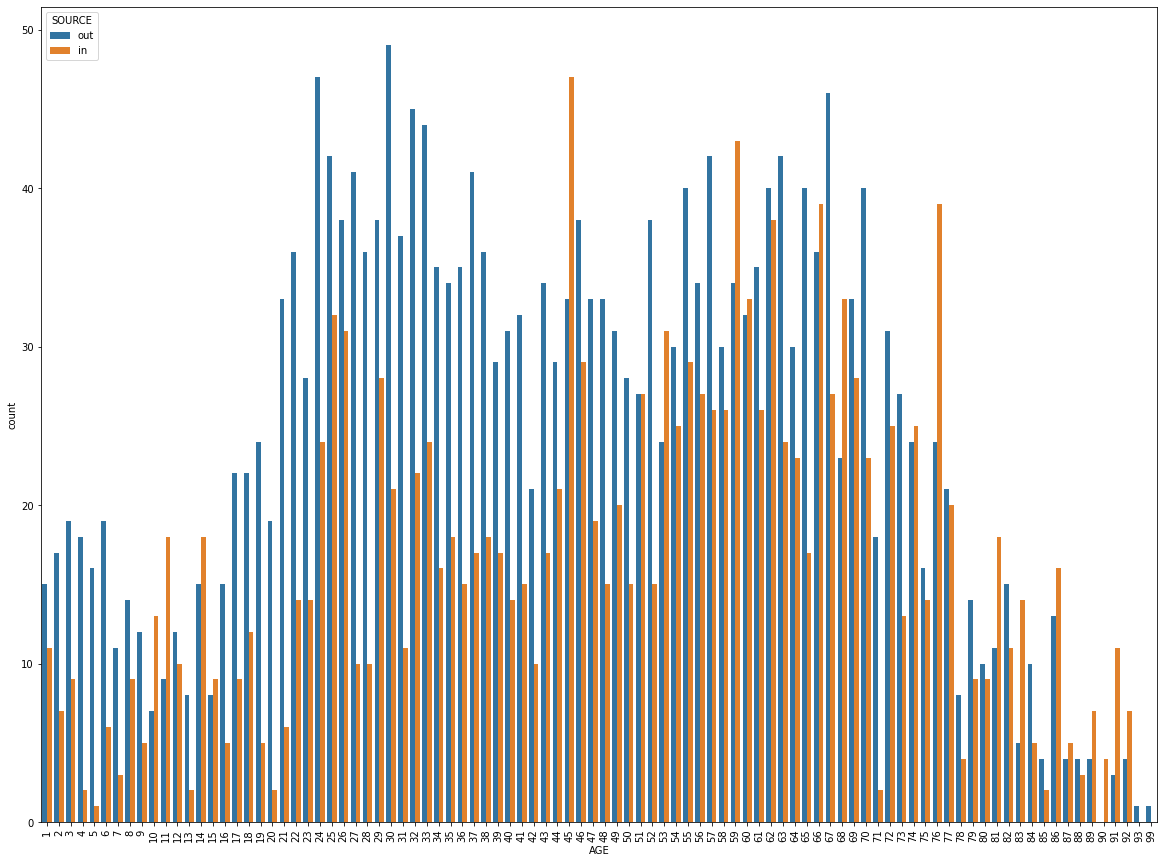

In [93]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['AGE'],hue=df['SOURCE'])
plt.xticks(rotation=90)
plt.show()

In [94]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out


In [95]:
df['AGE_Range']=pd.qcut(df['AGE'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_21984\1135452676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE_Range']=pd.qcut(df['AGE'],4)


In [96]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_Range
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out,"(0.999, 30.0]"
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out,"(0.999, 30.0]"
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out,"(0.999, 30.0]"
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out,"(0.999, 30.0]"
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out,"(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in,"(64.0, 99.0]"
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in,"(64.0, 99.0]"
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in,"(64.0, 99.0]"
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out,"(64.0, 99.0]"


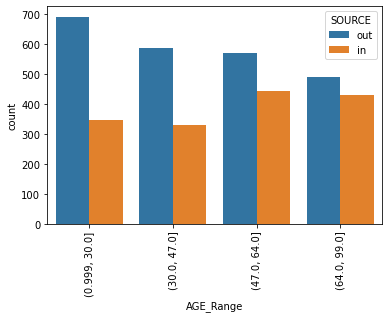

In [97]:
sns.countplot(x=df['AGE_Range'],hue=df['SOURCE'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='AGE_Range', ylabel='HAEMATOCRIT'>

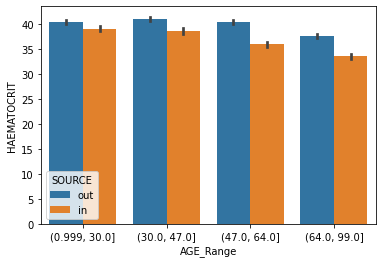

In [98]:
sns.barplot(x=df['AGE_Range'],y=df['HAEMATOCRIT'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='HAEMOGLOBINS'>

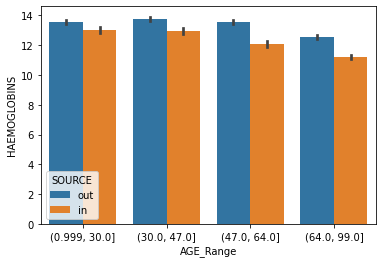

In [99]:
sns.barplot(x=df['AGE_Range'],y=df['HAEMOGLOBINS'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='ERYTHROCYTE'>

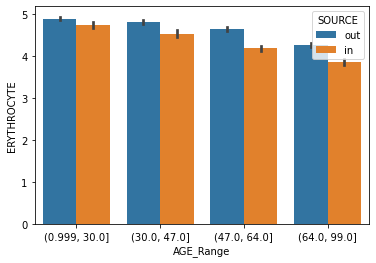

In [100]:
sns.barplot(x=df['AGE_Range'],y=df['ERYTHROCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='LEUCOCYTE'>

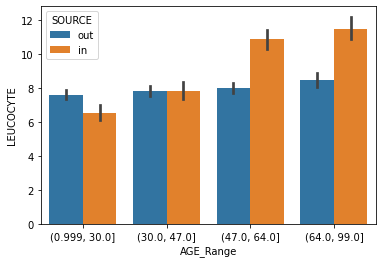

In [101]:

sns.barplot(x=df['AGE_Range'],y=df['LEUCOCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='THROMBOCYTE'>

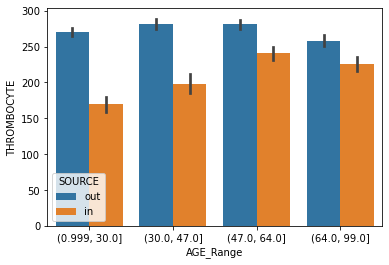

In [102]:
sns.barplot(x=df['AGE_Range'],y=df['THROMBOCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='MCH'>

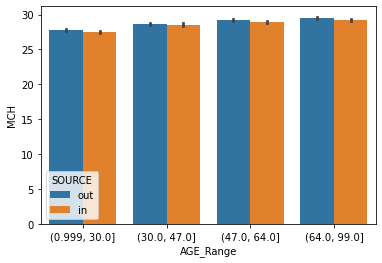

In [103]:
sns.barplot(x=df['AGE_Range'],y=df['MCH'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='MCHC'>

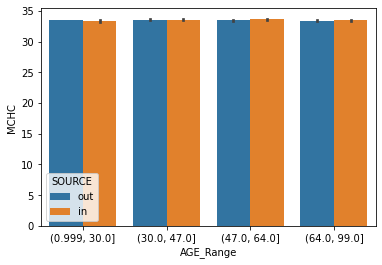

In [104]:
sns.barplot(x=df['AGE_Range'],y=df['MCHC'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='MCV'>

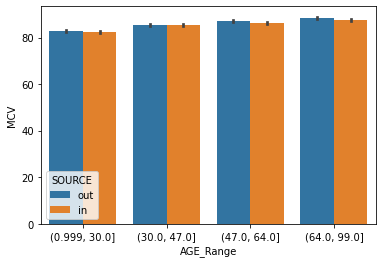

In [105]:
sns.barplot(x=df['AGE_Range'],y=df['MCV'],hue=df['SOURCE'])

In [106]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_Range
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out,"(0.999, 30.0]"
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out,"(0.999, 30.0]"
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out,"(0.999, 30.0]"
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out,"(0.999, 30.0]"
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out,"(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in,"(64.0, 99.0]"
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in,"(64.0, 99.0]"
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in,"(64.0, 99.0]"
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out,"(64.0, 99.0]"


<AxesSubplot:xlabel='AGE_Range', ylabel='HAEMATOCRIT'>

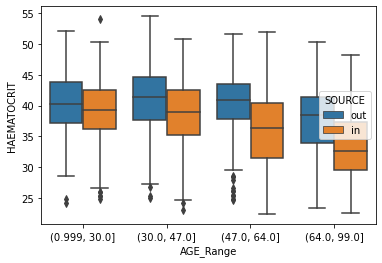

In [107]:
sns.boxplot(x=df['AGE_Range'],y=df['HAEMATOCRIT'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='HAEMOGLOBINS'>

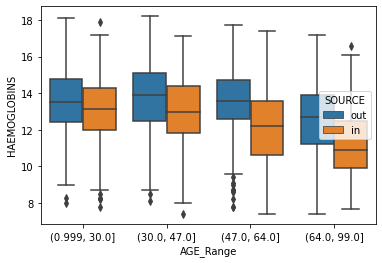

In [108]:
sns.boxplot(x=df['AGE_Range'],y=df['HAEMOGLOBINS'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='ERYTHROCYTE'>

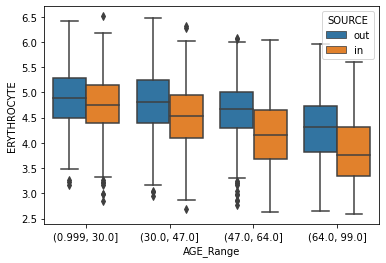

In [109]:

sns.boxplot(x=df['AGE_Range'],y=df['ERYTHROCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='LEUCOCYTE'>

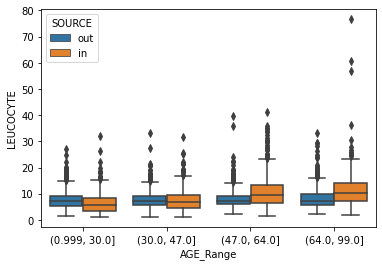

In [110]:
sns.boxplot(x=df['AGE_Range'],y=df['LEUCOCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='THROMBOCYTE'>

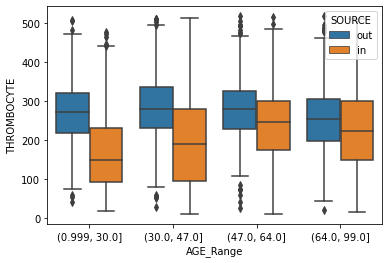

In [111]:

sns.boxplot(x=df['AGE_Range'],y=df['THROMBOCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='MCH'>

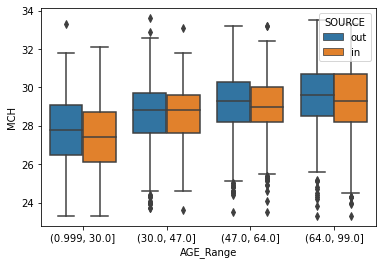

In [112]:

sns.boxplot(x=df['AGE_Range'],y=df['MCH'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='MCHC'>

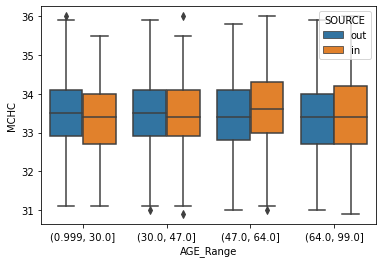

In [113]:

sns.boxplot(x=df['AGE_Range'],y=df['MCHC'],hue=df['SOURCE'])

<AxesSubplot:xlabel='AGE_Range', ylabel='MCV'>

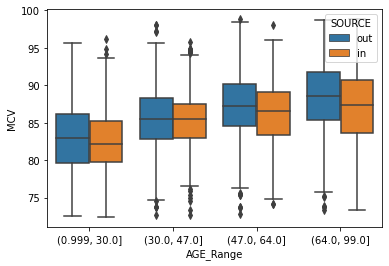

In [114]:
sns.boxplot(x=df['AGE_Range'],y=df['MCV'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='HAEMATOCRIT'>

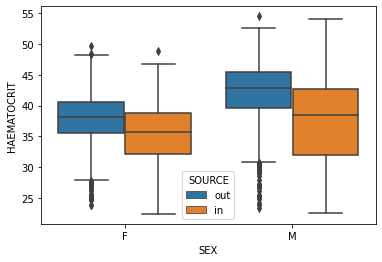

In [115]:
sns.boxplot(x=df['SEX'],y=df['HAEMATOCRIT'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='HAEMOGLOBINS'>

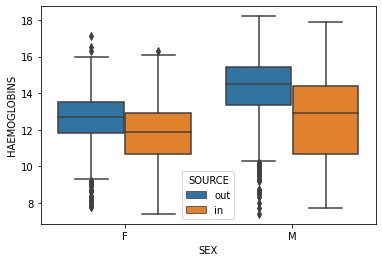

In [116]:
sns.boxplot(x=df['SEX'],y=df['HAEMOGLOBINS'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='ERYTHROCYTE'>

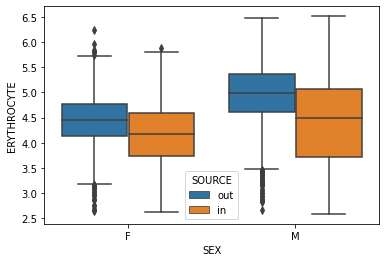

In [117]:

sns.boxplot(x=df['SEX'],y=df['ERYTHROCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='LEUCOCYTE'>

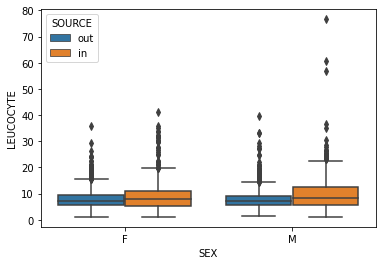

In [118]:
sns.boxplot(x=df['SEX'],y=df['LEUCOCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='THROMBOCYTE'>

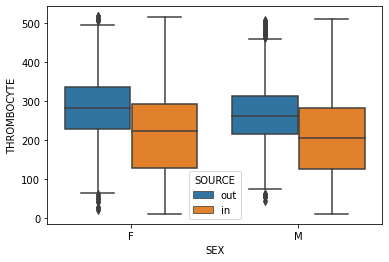

In [119]:

sns.boxplot(x=df['SEX'],y=df['THROMBOCYTE'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='MCH'>

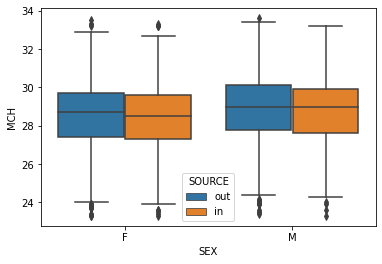

In [120]:

sns.boxplot(x=df['SEX'],y=df['MCH'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='MCHC'>

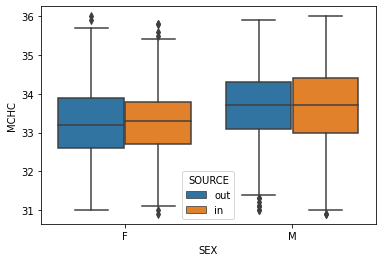

In [121]:
sns.boxplot(x=df['SEX'],y=df['MCHC'],hue=df['SOURCE'])

<AxesSubplot:xlabel='SEX', ylabel='MCV'>

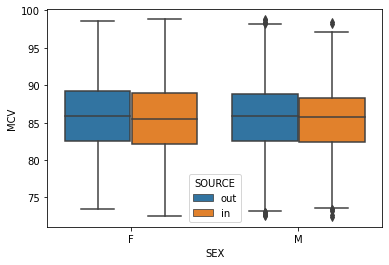

In [122]:
sns.boxplot(x=df['SEX'],y=df['MCV'],hue=df['SOURCE'])

In [123]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_Range
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out,"(0.999, 30.0]"
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out,"(0.999, 30.0]"
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out,"(0.999, 30.0]"
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out,"(0.999, 30.0]"
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out,"(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in,"(64.0, 99.0]"
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in,"(64.0, 99.0]"
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in,"(64.0, 99.0]"
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out,"(64.0, 99.0]"


<AxesSubplot:xlabel='SOURCE', ylabel='HAEMATOCRIT'>

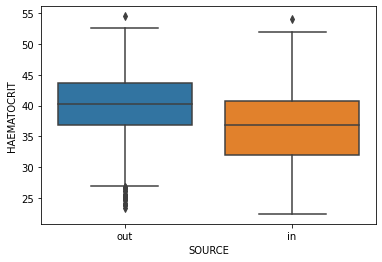

In [124]:
sns.boxplot(x=df['SOURCE'],y=df['HAEMATOCRIT'])

<AxesSubplot:xlabel='SOURCE', ylabel='HAEMOGLOBINS'>

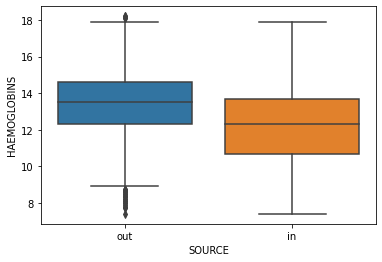

In [125]:
sns.boxplot(x=df['SOURCE'],y=df['HAEMOGLOBINS'])

<AxesSubplot:xlabel='SOURCE', ylabel='ERYTHROCYTE'>

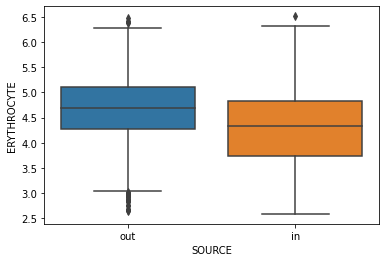

In [126]:

sns.boxplot(x=df['SOURCE'],y=df['ERYTHROCYTE'])

<AxesSubplot:xlabel='SOURCE', ylabel='LEUCOCYTE'>

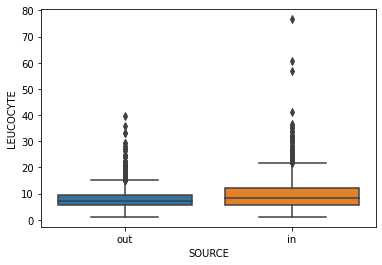

In [127]:
sns.boxplot(x=df['SOURCE'],y=df['LEUCOCYTE'])

<AxesSubplot:xlabel='SOURCE', ylabel='THROMBOCYTE'>

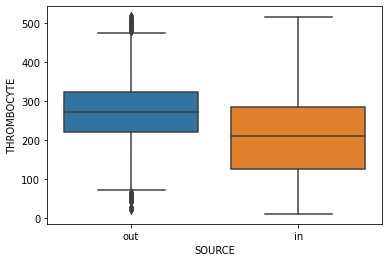

In [128]:

sns.boxplot(x=df['SOURCE'],y=df['THROMBOCYTE'])

<AxesSubplot:xlabel='SOURCE', ylabel='MCH'>

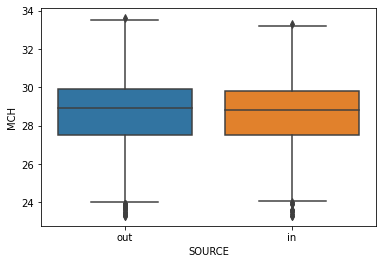

In [129]:

sns.boxplot(x=df['SOURCE'],y=df['MCH'])

<AxesSubplot:xlabel='SOURCE', ylabel='MCHC'>

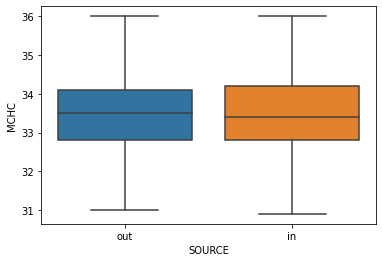

In [130]:
sns.boxplot(x=df['SOURCE'],y=df['MCHC'])

<AxesSubplot:xlabel='SOURCE', ylabel='MCV'>

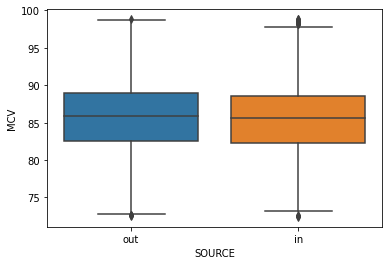

In [131]:
sns.boxplot(x=df['SOURCE'],y=df['MCV'])

<AxesSubplot:xlabel='SOURCE', ylabel='AGE'>

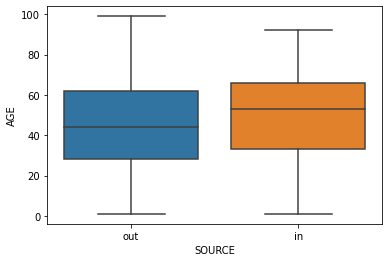

In [132]:
sns.boxplot(x=df['SOURCE'],y=df['AGE'])

In [133]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_Range
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out,"(0.999, 30.0]"
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out,"(0.999, 30.0]"
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out,"(0.999, 30.0]"
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out,"(0.999, 30.0]"
5,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out,"(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in,"(64.0, 99.0]"
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in,"(64.0, 99.0]"
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in,"(64.0, 99.0]"
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out,"(64.0, 99.0]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HAEMATOCRIT', ylabel='Density'>

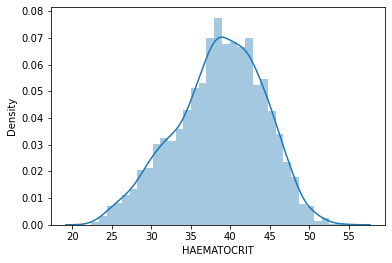

In [134]:
sns.distplot(df['HAEMATOCRIT'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HAEMOGLOBINS', ylabel='Density'>

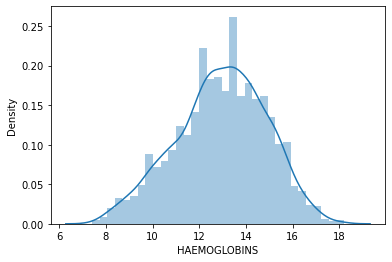

In [135]:
sns.distplot(df['HAEMOGLOBINS'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ERYTHROCYTE', ylabel='Density'>

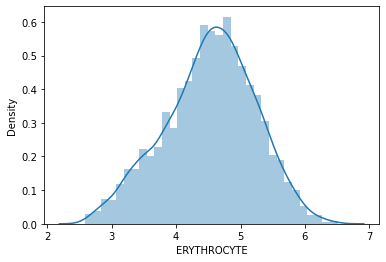

In [136]:
sns.distplot(df['ERYTHROCYTE'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LEUCOCYTE', ylabel='Density'>

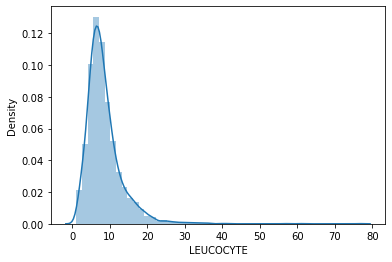

In [137]:
sns.distplot(df['LEUCOCYTE'])

In [138]:
df['LEUCOCYTE']=np.log(df['LEUCOCYTE'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_21984\1684797307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LEUCOCYTE']=np.log(df['LEUCOCYTE'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LEUCOCYTE', ylabel='Density'>

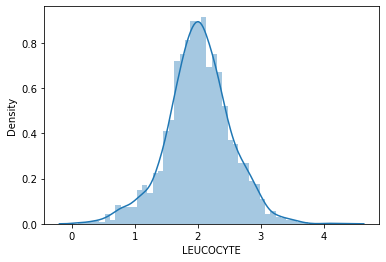

In [139]:
sns.distplot(df['LEUCOCYTE'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='THROMBOCYTE', ylabel='Density'>

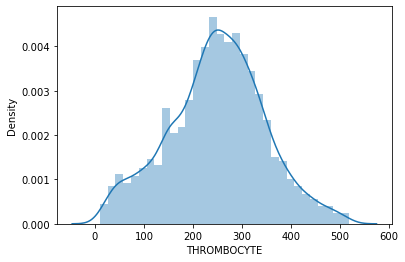

In [140]:
sns.distplot(df['THROMBOCYTE'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MCH', ylabel='Density'>

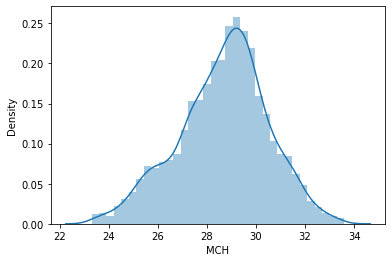

In [141]:
sns.distplot(df['MCH'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MCHC', ylabel='Density'>

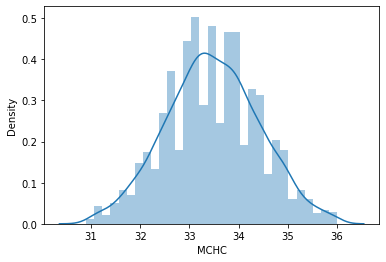

In [142]:
sns.distplot(df['MCHC'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MCV', ylabel='Density'>

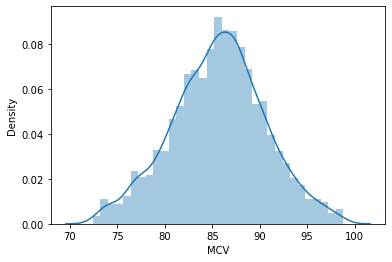

In [143]:
sns.distplot(df['MCV'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

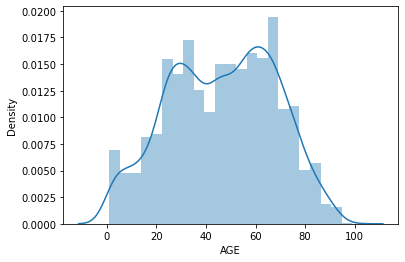

In [144]:
sns.distplot(df['AGE'])

In [145]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_Range
0,35.1,11.8,4.65,1.840550,310,25.4,33.6,75.5,1,F,out,"(0.999, 30.0]"
1,43.5,14.8,5.39,2.541602,334,27.5,34.0,80.7,1,F,out,"(0.999, 30.0]"
3,39.1,13.7,4.98,2.351375,366,27.5,35.0,78.5,1,F,out,"(0.999, 30.0]"
4,30.9,9.9,4.23,3.095578,333,23.4,32.0,73.0,1,M,out,"(0.999, 30.0]"
5,34.3,11.6,4.53,1.887070,185,25.6,33.8,75.7,1,M,out,"(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,2.433613,112,29.9,30.9,96.8,92,F,in,"(64.0, 99.0]"
4407,32.8,10.4,3.49,2.091864,72,29.8,31.7,94.0,92,F,in,"(64.0, 99.0]"
4408,33.7,10.8,3.67,1.902108,70,29.4,32.0,91.8,92,F,in,"(64.0, 99.0]"
4409,33.2,11.2,3.47,1.974081,235,32.3,33.7,95.7,93,F,out,"(64.0, 99.0]"


In [146]:
df['SOURCE'].value_counts()/len(df)

out    0.60139
in     0.39861
Name: SOURCE, dtype: float64

In [147]:
le=LabelEncoder()


In [148]:
df['AGE']=le.fit_transform(df['AGE'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_21984\174926550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE']=le.fit_transform(df['AGE'])


In [149]:
df['SEX']=le.fit_transform(df['SEX'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_21984\1073878600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX']=le.fit_transform(df['SEX'])


In [150]:
df['SOURCE']=le.fit_transform(df['SOURCE'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_21984\2633682247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOURCE']=le.fit_transform(df['SOURCE'])


In [151]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_Range
0,35.1,11.8,4.65,1.840550,310,25.4,33.6,75.5,0,0,1,"(0.999, 30.0]"
1,43.5,14.8,5.39,2.541602,334,27.5,34.0,80.7,0,0,1,"(0.999, 30.0]"
3,39.1,13.7,4.98,2.351375,366,27.5,35.0,78.5,0,0,1,"(0.999, 30.0]"
4,30.9,9.9,4.23,3.095578,333,23.4,32.0,73.0,0,1,1,"(0.999, 30.0]"
5,34.3,11.6,4.53,1.887070,185,25.6,33.8,75.7,0,1,1,"(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,2.433613,112,29.9,30.9,96.8,91,0,0,"(64.0, 99.0]"
4407,32.8,10.4,3.49,2.091864,72,29.8,31.7,94.0,91,0,0,"(64.0, 99.0]"
4408,33.7,10.8,3.67,1.902108,70,29.4,32.0,91.8,91,0,0,"(64.0, 99.0]"
4409,33.2,11.2,3.47,1.974081,235,32.3,33.7,95.7,92,0,1,"(64.0, 99.0]"


In [152]:
df=df.drop('AGE_Range',axis=1)


In [153]:
df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,1.840550,310,25.4,33.6,75.5,0,0,1
1,43.5,14.8,5.39,2.541602,334,27.5,34.0,80.7,0,0,1
3,39.1,13.7,4.98,2.351375,366,27.5,35.0,78.5,0,0,1
4,30.9,9.9,4.23,3.095578,333,23.4,32.0,73.0,0,1,1
5,34.3,11.6,4.53,1.887070,185,25.6,33.8,75.7,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4406,33.7,10.4,3.48,2.433613,112,29.9,30.9,96.8,91,0,0
4407,32.8,10.4,3.49,2.091864,72,29.8,31.7,94.0,91,0,0
4408,33.7,10.8,3.67,1.902108,70,29.4,32.0,91.8,91,0,0
4409,33.2,11.2,3.47,1.974081,235,32.3,33.7,95.7,92,0,1


In [154]:
y=df['SOURCE']

In [155]:
X=df.drop('SOURCE',axis=1)

In [156]:
sc=StandardScaler()

In [157]:
X=sc.fit_transform(X)


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [159]:
X_train.shape

(3108, 10)

In [160]:
X_test.shape

(778, 10)

# RandomForestClassifier

In [161]:
rfc=RandomForestClassifier()

In [162]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [163]:
y_pred=rfc.predict(X_train)


In [164]:
accuracy_score(y_train,y_pred)

1.0

In [165]:
y_pred=rfc.predict(X_test)


In [166]:
accuracy_score(y_test,y_pred)

0.7467866323907455

In [167]:
KF=KFold(5)


In [168]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [169]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6987179487179487
1 0.7307692307692307
2 0.7435897435897436
3 0.7290322580645161
4 0.7354838709677419


In [170]:
scores.mean()

0.7275186104218362

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64       299
           1       0.77      0.84      0.80       479

    accuracy                           0.75       778
   macro avg       0.73      0.72      0.72       778
weighted avg       0.74      0.75      0.74       778



# LogisticRegression

In [172]:
lr=LogisticRegression()


In [173]:
lr.fit(X_train,y_train)

LogisticRegression()

In [174]:
y_pred=lr.predict(X_train)


In [175]:
accuracy_score(y_train,y_pred)

0.7403474903474904

In [176]:
y_pred=lr.predict(X_test)


In [177]:
accuracy_score(y_test,y_pred)

0.7197943444730077

In [178]:
KF=KFold(5)


In [179]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [180]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7115384615384616
1 0.7435897435897436
2 0.7307692307692307
3 0.7419354838709677
4 0.7032258064516129


In [181]:
scores.mean()

0.7262117452440033

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58       299
           1       0.73      0.85      0.79       479

    accuracy                           0.72       778
   macro avg       0.71      0.68      0.69       778
weighted avg       0.71      0.72      0.71       778



# KNeighborsClassifier

In [183]:
knc=KNeighborsClassifier()


In [184]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [185]:
y_pred=knc.predict(X_train)


In [186]:
accuracy_score(y_train,y_pred)

0.8153153153153153

In [187]:
y_pred=knc.predict(X_test)


In [188]:
accuracy_score(y_test,y_pred)

0.7300771208226221

In [189]:
KF=KFold(5)


In [190]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [191]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6538461538461539
1 0.7115384615384616
2 0.6923076923076923
3 0.7419354838709677
4 0.6580645161290323


In [192]:
scores.mean()

0.6915384615384615

In [193]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62       299
           1       0.76      0.82      0.79       479

    accuracy                           0.73       778
   macro avg       0.72      0.70      0.71       778
weighted avg       0.73      0.73      0.73       778



# XGBClassifier

In [194]:
xgb_i=xgb.XGBClassifier()

In [195]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [196]:
y_pred=xgb_i.predict(X_train)


In [197]:
accuracy_score(y_train,y_pred)

0.990990990990991

In [198]:
y_pred=xgb_i.predict(X_test)


In [199]:
accuracy_score(y_test,y_pred)

0.7275064267352185

In [200]:
KF=KFold(5)


In [201]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [202]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7115384615384616
1 0.7307692307692307
2 0.7051282051282052
3 0.7612903225806451
4 0.7483870967741936


In [203]:
scores.mean()

0.7314226633581472

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62       299
           1       0.76      0.81      0.79       479

    accuracy                           0.73       778
   macro avg       0.71      0.70      0.71       778
weighted avg       0.72      0.73      0.72       778



# DecisionTreeClassifier

In [205]:
dtc=DecisionTreeClassifier()


In [206]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [207]:
y_pred=dtc.predict(X_train)


In [208]:
accuracy_score(y_train,y_pred)

1.0

In [209]:
y_pred=dtc.predict(X_test)


In [210]:
accuracy_score(y_test,y_pred)

0.6580976863753213

In [211]:
KF=KFold(5)


In [212]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [213]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6602564102564102
1 0.6410256410256411
2 0.6538461538461539
3 0.6451612903225806
4 0.6516129032258065


In [214]:
scores.mean()

0.6503804797353185

In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       299
           1       0.72      0.73      0.73       479

    accuracy                           0.66       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.66      0.66      0.66       778



# Naive Bayes Classifier

In [216]:
model=GaussianNB()


In [217]:
model.fit(X_train,y_train)

GaussianNB()

In [218]:
y_pred=model.predict(X_train)


In [219]:
accuracy_score(y_train,y_pred)

0.7232947232947233

In [220]:
y_pred=model.predict(X_test)


In [221]:
accuracy_score(y_test,y_pred)

0.7197943444730077

In [222]:
KF=KFold(5)


In [223]:
scores=cross_val_score(model,X_test,y_test,cv=KF)


In [224]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6666666666666666
1 0.7756410256410257
2 0.7307692307692307
3 0.7225806451612903
4 0.7161290322580646


In [225]:
scores.mean()

0.7223573200992556

In [226]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.54      0.59       299
           1       0.74      0.84      0.79       479

    accuracy                           0.72       778
   macro avg       0.71      0.69      0.69       778
weighted avg       0.71      0.72      0.71       778



# ANN

In [227]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(10,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [228]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [229]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
98/98 [==============================] - 1s 1ms/step - loss: 0.6170 - accuracy: 0.6728
Epoch 2/10
98/98 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7291
Epoch 3/10
98/98 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.7555
Epoch 4/10
98/98 [==============================] - 0s 1ms/step - loss: 0.5177 - accuracy: 0.7593
Epoch 5/10
98/98 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7616
Epoch 6/10
98/98 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.7680
Epoch 7/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7699
Epoch 8/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7728
Epoch 9/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7757
Epoch 10/10
98/98 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7735


In [230]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 0s 947us/step - loss: 0.5174 - accuracy: 0.7506


[0.5173835158348083, 0.7506426572799683]

In [231]:
y_pred=model.predict(X_test)

25/25 [==============================] - 0s 1ms/step


In [232]:
y_pred[:10]

array([[0.9285394 ],
       [0.24250118],
       [0.83163714],
       [0.68688905],
       [0.92374396],
       [0.74404204],
       [0.51189786],
       [0.92228585],
       [0.8042703 ],
       [0.55934614]], dtype=float32)

In [233]:
y_test[:10]

1525    1
3236    0
4061    1
4089    1
2051    1
2440    1
835     0
412     1
1389    1
378     0
Name: SOURCE, dtype: int32

In [234]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [235]:
ypred[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]